##Prerequisite (Libraries, read file)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
# Path to the folder containing all JSON files
file_path = '/content/drive/My Drive/restaurant_data/reb5930.json'
df = pd.read_json(file_path)
print(df)

      blur_restaurant_uuid                           blur_invoice_id  \
0                  reb5930  6cf1177465fd417caeea7e1bea1e6f1aed657acb   
1                  reb5930  983757c849d033d45aa0d84e2a7391b27544f650   
2                  reb5930  ba8b830ba2006ffdb56ea510ac9cc9e5e511f582   
3                  reb5930  53a43084f91192253be96e0064235f3568aeba79   
4                  reb5930  d11ac0b0d24f05eddf875299c9ab6766472c7ea3   
...                    ...                                       ...   
57756              reb5930  2af6dcceebc993ffd4f58099abcdc027c79af5c8   
57757              reb5930  85e179eab325c405aa6b13faea3150db450545fa   
57758              reb5930  22195521eeada23d9aa36b06a91866021ebf15e9   
57759              reb5930  f85bf4391a5f4890b626e46f9d9e9cdc04b2a93a   
57760              reb5930  3e2531fe071774269c39c004c0a52e6bbc6f61ec   

       invoice_unix_timestamp  invoice_total_amount  invoice_discount_amount  \
0                1.617410e+09                 140.0    

## Data Analysis Details

###1. Use K-Means Clustering to distinguish groups

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# Copy the relevant columns into a new DataFrame for transformation
kmeans_data = df[['invoice_unix_timestamp',
                  'invoice_total_amount',
                  'invoice_discount_amount',
                  'customer_group_people',
                  'customer_group_service_type',
                  'platform_type',
                  'order_type']].copy()

# Convert 'invoice_unix_timestamp' to datetime format
kmeans_data['invoice_unix_timestamp'] = pd.to_datetime(kmeans_data['invoice_unix_timestamp'], unit='s')

# Calculate the net amount (invoice_total_amount - invoice_discount_amount)
kmeans_data['net_amount'] = pd.to_numeric(kmeans_data['invoice_total_amount']) - pd.to_numeric(kmeans_data['invoice_discount_amount'])

# Drop the original 'invoice_total_amount' and 'invoice_discount_amount' columns
kmeans_data = kmeans_data.drop(['invoice_total_amount', 'invoice_discount_amount'], axis=1)

# One-hot encode categorical columns
categorical_columns = ['customer_group_service_type', 'platform_type', 'order_type']
kmeans_data = pd.get_dummies(kmeans_data, columns=categorical_columns)


# Display the transformed DataFrame
print(kmeans_data)


             invoice_unix_timestamp  customer_group_people  net_amount  \
0     2021-04-03 00:41:16.638400000                      1       140.0   
1     2021-04-03 00:47:37.555900160                      1       220.0   
2     2021-04-03 01:08:35.874200064                      1       240.0   
3     2021-04-03 01:38:27.543800064                      1       105.0   
4     2021-04-03 01:42:30.256200192                      1        65.0   
...                             ...                    ...         ...   
57756 2023-10-06 05:30:26.000000000                      1        65.0   
57757 2023-10-06 05:30:32.000000000                      1       195.0   
57758 2023-10-06 05:30:38.402299904                      1       120.0   
57759 2023-10-06 05:30:42.000000000                      1        99.0   
57760 2023-10-06 05:30:46.000000000                      1        80.0   

       customer_group_service_type_delivery  \
0                                         0   
1                

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named kmeans_data
# Extract numerical columns for scaling
numerical_columns = ['customer_group_people', 'net_amount']

# Apply StandardScaler to the numerical columns
scaler = StandardScaler()
kmeans_data[numerical_columns] = scaler.fit_transform(kmeans_data[numerical_columns])

# Display the transformed DataFrame
print(kmeans_data)


             invoice_unix_timestamp  customer_group_people  net_amount  \
0     2021-04-03 00:41:16.638400000               -0.09598   -0.051305   
1     2021-04-03 00:47:37.555900160               -0.09598    0.722666   
2     2021-04-03 01:08:35.874200064               -0.09598    0.916159   
3     2021-04-03 01:38:27.543800064               -0.09598   -0.389918   
4     2021-04-03 01:42:30.256200192               -0.09598   -0.776903   
...                             ...                    ...         ...   
57756 2023-10-06 05:30:26.000000000               -0.09598   -0.776903   
57757 2023-10-06 05:30:32.000000000               -0.09598    0.480800   
57758 2023-10-06 05:30:38.402299904               -0.09598   -0.244798   
57759 2023-10-06 05:30:42.000000000               -0.09598   -0.447965   
57760 2023-10-06 05:30:46.000000000               -0.09598   -0.631784   

       customer_group_service_type_delivery  \
0                                         0   
1                

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

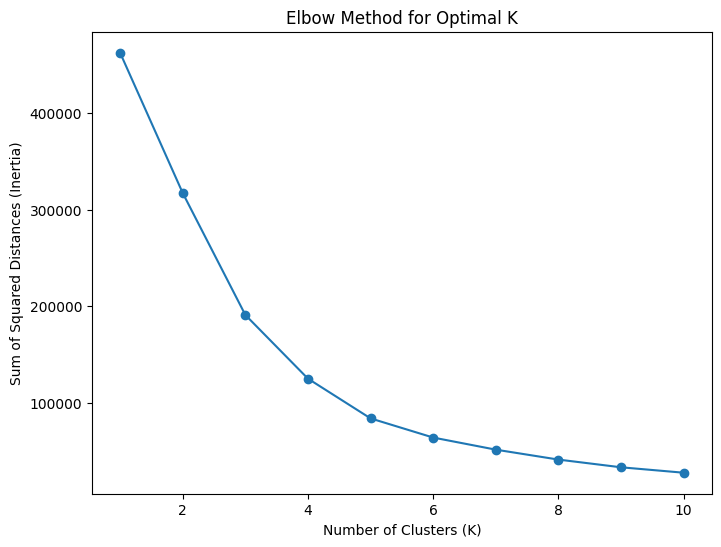

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named kmeans_data
# Extract features for clustering
features_for_clustering = ['customer_group_people', 'net_amount', 'customer_group_service_type_indoor',
                            'customer_group_service_type_takeout', 'platform_type_ichef', 'platform_type_ichef_instore',
                            'order_type_dine_in', 'order_type_pick_up']

# Standardize the features for better clustering results
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(kmeans_data[features_for_clustering])

# Perform the elbow method
inertia = []
k_range = range(1, 11)  # You can adjust the range based on your needs

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


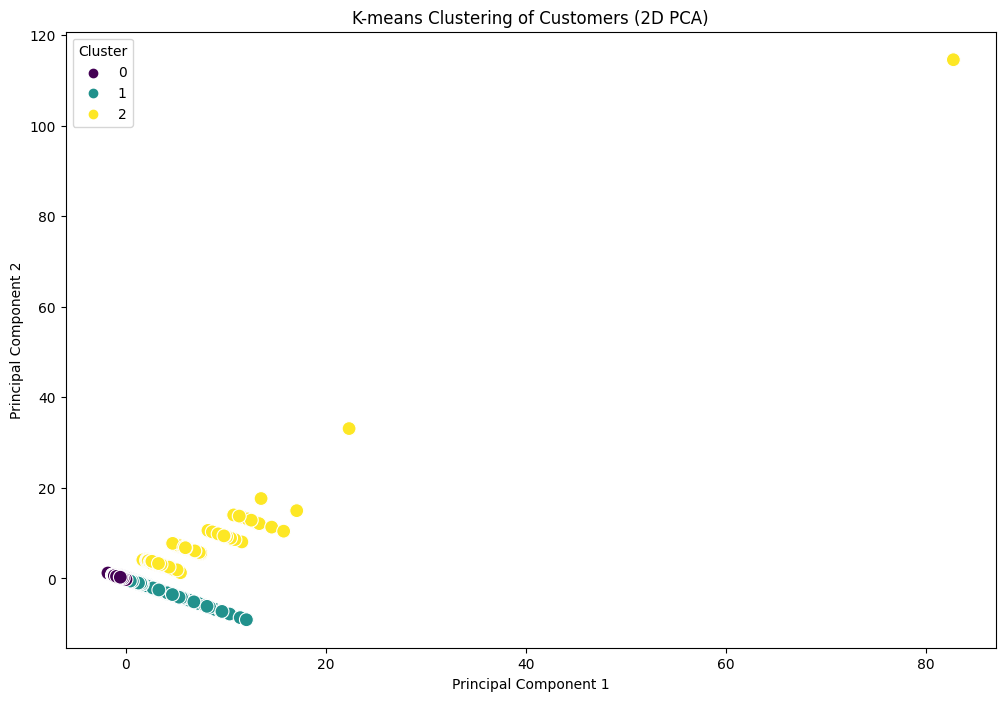

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named kmeans_data
features_for_pca = ['customer_group_people', 'net_amount', 'customer_group_service_type_indoor',
                    'customer_group_service_type_takeout', 'platform_type_ichef', 'platform_type_ichef_instore',
                    'order_type_dine_in', 'order_type_pick_up']

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(kmeans_data[features_for_pca])

# Choose the number of clusters (K)
k = 3

# Apply K-means clustering on the principal components
kmeans = KMeans(n_clusters=k, random_state=42)
# add 'cluster' label
kmeans_data['cluster'] = kmeans.fit_predict(principal_components)

# Visualize the clusters using PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pd.DataFrame(principal_components, columns=['PC1', 'PC2']).join(kmeans_data['cluster']), palette='viridis', s=100)
plt.title('K-means Clustering of Customers (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Explained variance ratio (lose dimension以外loss了多少)
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

Explained Variance Ratio: [0.421866   0.34275945]


###3. 分群結果分析

分群人數

In [ ]:
cluster_counts = kmeans_data['cluster'].value_counts()

for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} data points")

Cluster 0: 41625 data points
Cluster 1: 15163 data points
Cluster 2: 973 data points


##Group People & Cluster 關係

<ipython-input-83-43f9b45d1406>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y='customer_group_people', data=kmeans_data, palette='viridis', ci=None)


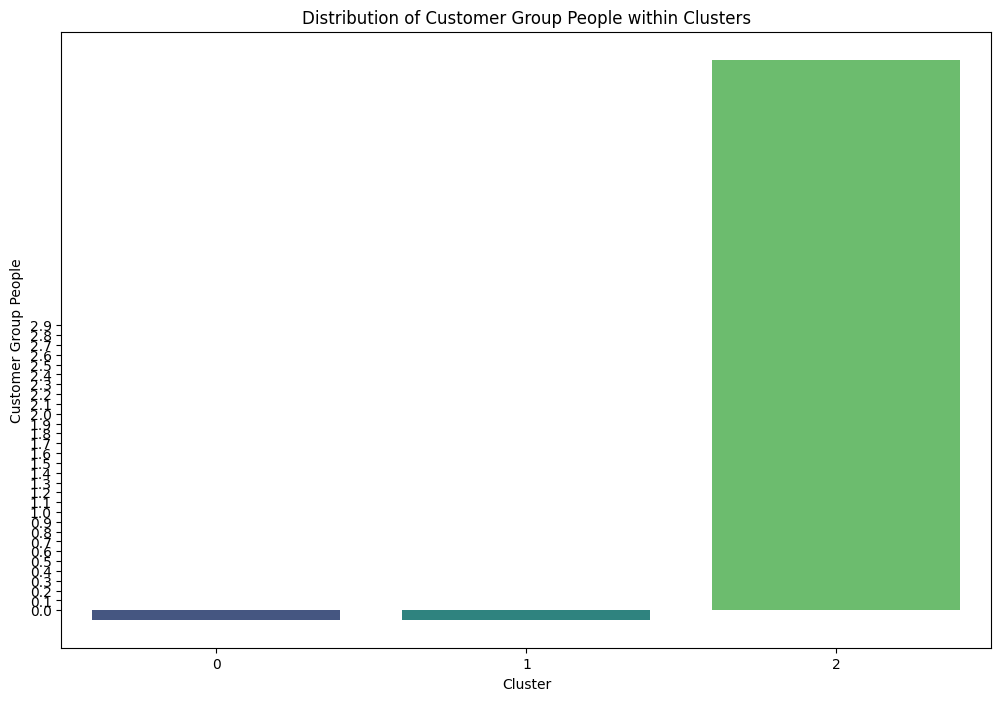

   cluster  customer_group_people  count
0        0              -0.095980  41625
1        1              -0.095980  15163
2        2               4.371296    805
3        2               8.838573    117
4        2              13.305849     37
5        2              17.773125     10
6        2              22.240401      2
7        2              40.109506      1
8        2             142.856858      1


In [ ]:
# Assuming 'kmeans_data' is your DataFrame with 'cluster' and 'customer_group_people' columns
# Replace 'kmeans_data' with your actual DataFrame name

# Barplot with custom y-axis ticks
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='customer_group_people', data=kmeans_data, palette='viridis', ci=None)

# Set custom y-axis ticks with a smaller interval (e.g., every 0.1)
plt.yticks(np.arange(0, 3, 0.1))

plt.title('Distribution of Customer Group People within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Customer Group People')
plt.show()

# Count the number of occurrences of each 'customer_group_people' within each cluster
cluster_counts = kmeans_data.groupby(['cluster', 'customer_group_people']).size().reset_index(name='count')

# Print the result
print(cluster_counts)



RESULT:

Cluster 0：

這個集群的顧客人數主要分布在平均水平附近，並呈現相對穩定的趨勢。大多數交易的顧客人數保持在一個較小的範圍內，整體上看，這個集群的顧客人數差異不大。
Cluster 1：

這個集群中的顧客人數同樣主要分布在平均水平附近，並且保持相對穩定。整體上，這個集群的顧客人數差異較小，呈現出相對均勻的分布。
Cluster 2：

這個集群的顧客人數分布相對較廣，從較小的數值到較大的數值都有。大多數交易的顧客人數集中在一個中等範圍內，但也存在一些極端情況，即極大或極小的顧客人數。這表明這個集群可能包含一些交易中顧客人數差異較大的特定情境。

=> Cluster 0 和 Cluster 1 的顧客人數分佈相對均勻穩定，而 Cluster 2 呈現出更大的變化範圍，可能包含一些特殊情況

##Total Amount & Cluster的關係

<ipython-input-84-3c2d5dd98fdd>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y='net_amount', data=kmeans_data, palette='viridis', ci=None)


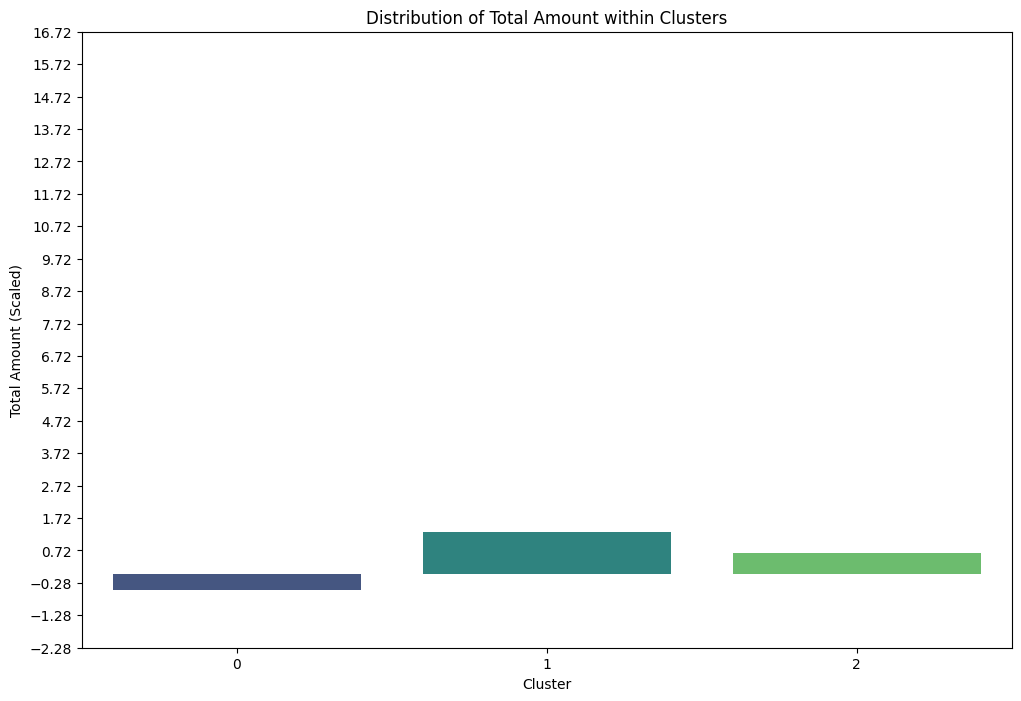

           count      mean       std       min       25%       50%       75%  \
cluster                                                                        
0        41625.0 -0.486529  0.397350 -2.276472 -0.776903 -0.535037 -0.244798   
1        15163.0  1.295058  0.987737  0.180886  0.625920  1.012905  1.690130   
2          973.0  0.631856  0.863160 -1.212262  0.045441  0.529173  1.061278   

               max  
cluster             
0         0.751690  
1        15.766730  
2         7.001507  


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'kmeans_data' is your DataFrame with 'cluster' and 'net_amount' columns
# Replace 'kmeans_data' with your actual DataFrame name

# Barplot with custom y-axis ticks
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='net_amount', data=kmeans_data, palette='viridis', ci=None)

# Set custom y-axis ticks to match the scaled values
y_ticks_scaled = np.arange(kmeans_data['net_amount'].min(), kmeans_data['net_amount'].max() + 1, 1)
plt.yticks(y_ticks_scaled)

plt.title('Distribution of Total Amount within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Total Amount (Scaled)')
plt.show()

# Assuming 'kmeans_data' is your DataFrame with 'cluster' and 'net_amount' columns
# Replace 'kmeans_data' with your actual DataFrame name

# Print out summary statistics for 'net_amount' within each cluster
cluster_stats = kmeans_data.groupby('cluster')['net_amount'].describe()

# Display the summary statistics
print(cluster_stats)


Cluster 0：

這個集群的總金額呈現明顯的負偏態，大多數交易的金額分佈在較小的範圍內。整體上，這個集群的交易金額相對較低，並且缺乏極端高金額的交易。

Cluster 1：

這個集群的總金額呈現正偏態，大多數交易的金額集中在較高的範圍內。相對於其他集群，這個集群包含了一些金額較大的交易，顯示出一些高價值的交易。

Cluster 2：

這個集群的總金額分佈相對均勻，包含了一定範圍內的交易金額。然而，與其他集群相比，這個集群中的金額差異較大，可能包含了一些金額極端的交易。

=> Cluster 0 顯示出低金額的交易趨勢，Cluster 1 顯示出高金額的交易趨勢，而 Cluster 2 則呈現較為均勻的金額分佈，但仍包含一些極端情況。

##customer_group_service_type & Cluster的關係

<ipython-input-92-12bf27a63479>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y='value', hue='customer_group_service_type', data=melted_data, palette='viridis', ci=None)


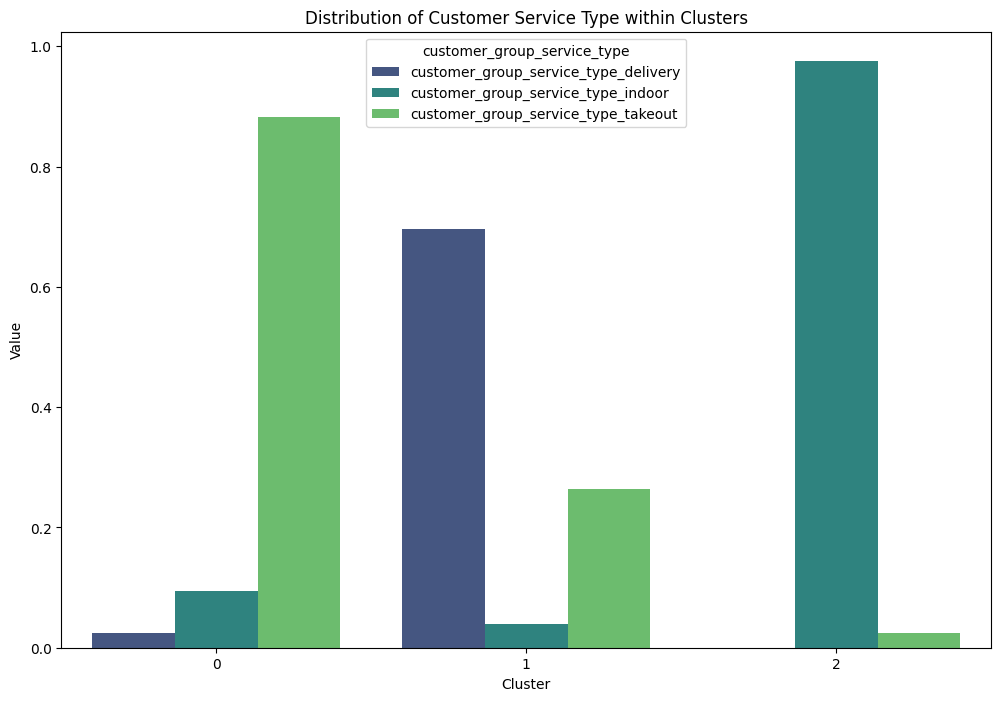

                                                value                      \
                                                count      mean       std   
cluster variable                                                            
0       customer_group_service_type_delivery  41625.0  0.023760  0.152302   
        customer_group_service_type_indoor    41625.0  0.093526  0.291171   
        customer_group_service_type_takeout   41625.0  0.882715  0.321764   
1       customer_group_service_type_delivery  15163.0  0.695773  0.460095   
        customer_group_service_type_indoor    15163.0  0.040164  0.196349   
        customer_group_service_type_takeout   15163.0  0.264064  0.440848   
2       customer_group_service_type_delivery    973.0  0.000000  0.000000   
        customer_group_service_type_indoor      973.0  0.975334  0.155185   
        customer_group_service_type_takeout     973.0  0.024666  0.155185   

                                                                       
   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming kmeans_data is your DataFrame
# Use pd.melt to reshape the data for barplot
melted_data = pd.melt(kmeans_data, id_vars=['cluster'], value_vars=['customer_group_service_type_delivery', 'customer_group_service_type_indoor', 'customer_group_service_type_takeout'], var_name='customer_group_service_type')

# Barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value', hue='customer_group_service_type', data=melted_data, palette='viridis', ci=None)

plt.title('Distribution of Customer Service Type within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.show()

# Use pd.melt to reshape the data for barplot
melted_data = pd.melt(kmeans_data, id_vars=['cluster'], value_vars=['customer_group_service_type_delivery', 'customer_group_service_type_indoor', 'customer_group_service_type_takeout'])

# Group by 'cluster' and 'variable', and calculate summary statistics
service_type_stats = melted_data.groupby(['cluster', 'variable']).describe()

# Display summary statistics for each cluster and service type
print(service_type_stats)

Cluster 0:

customer_group_service_type_delivery 的比例為 2.4%，customer_group_service_type_indoor 為 9.4%，customer_group_service_type_takeout 為 88.3%。
顯示這個群集的客戶主要使用**外帶**服務。

Cluster 1:

customer_group_service_type_delivery 的比例為 69.6%，customer_group_service_type_indoor 為 4.0%，customer_group_service_type_takeout 為 26.4%。
顯示這個群集的客戶主要使用**外送**服務。

Cluster 2:

customer_group_service_type_delivery 的比例為 0%，customer_group_service_type_indoor 為 97.5%，customer_group_service_type_takeout 為 2.5%。
這個群集的客戶主要使用**室內**服務，並且**沒有使用外送**服務。

##platform_type & Cluster的關係

<ipython-input-93-847a6c17769f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y='value', hue='platform_type', data=melted_data, palette='viridis', ci=None)


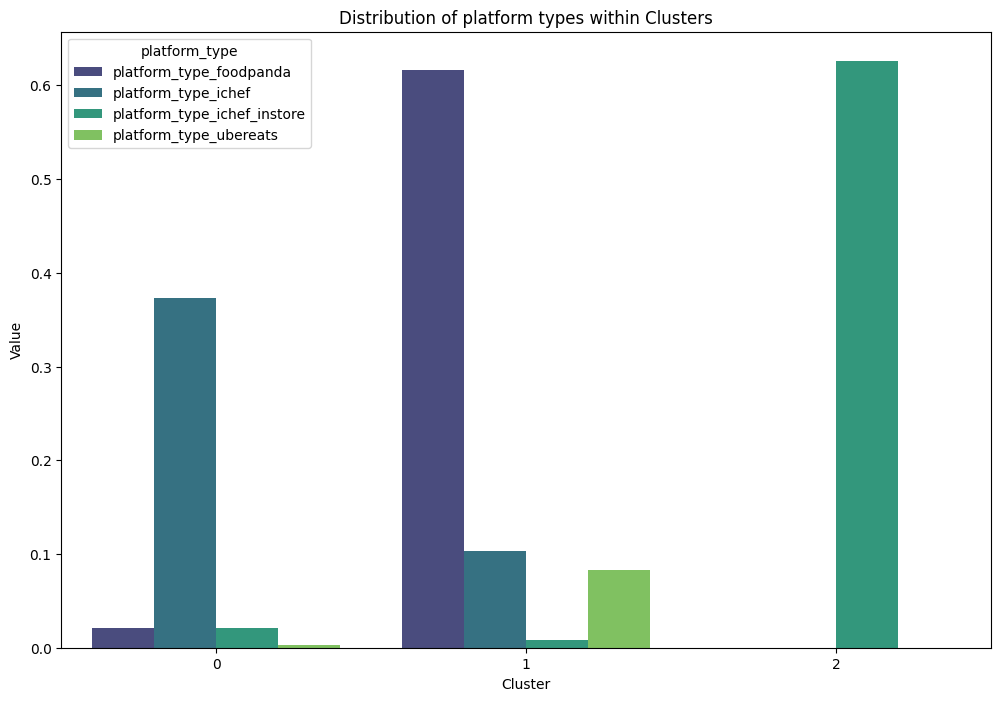

                                       value                                \
                                       count      mean       std  min  25%   
cluster variable                                                             
0       platform_type_foodpanda      41625.0  0.021117  0.143776  0.0  0.0   
        platform_type_ichef          41625.0  0.373117  0.483639  0.0  0.0   
        platform_type_ichef_instore  41625.0  0.021213  0.144096  0.0  0.0   
        platform_type_ubereats       41625.0  0.003411  0.058308  0.0  0.0   
1       platform_type_foodpanda      15163.0  0.615841  0.486412  0.0  0.0   
        platform_type_ichef          15163.0  0.103542  0.304675  0.0  0.0   
        platform_type_ichef_instore  15163.0  0.007782  0.087875  0.0  0.0   
        platform_type_ubereats       15163.0  0.083031  0.275938  0.0  0.0   
2       platform_type_foodpanda        973.0  0.000000  0.000000  0.0  0.0   
        platform_type_ichef            973.0  0.000000  0.000000

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming kmeans_data is your DataFrame
# Use pd.melt to reshape the data for barplot
melted_data = pd.melt(kmeans_data, id_vars=['cluster'], value_vars=['platform_type_foodpanda', 'platform_type_ichef', 'platform_type_ichef_instore','platform_type_ubereats'], var_name='platform_type')

# Barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value', hue='platform_type', data=melted_data, palette='viridis', ci=None)

plt.title('Distribution of platform types within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.show()

# Use pd.melt to reshape the data for barplot
melted_data = pd.melt(kmeans_data, id_vars=['cluster'], value_vars=['platform_type_foodpanda', 'platform_type_ichef', 'platform_type_ichef_instore','platform_type_ubereats'])

# Group by 'cluster' and 'variable', and calculate summary statistics
service_type_stats = melted_data.groupby(['cluster', 'variable']).describe()

# Display summary statistics for each cluster and service type
print(service_type_stats)

Cluster 0:

platform_type_foodpanda 的比例為 2.1%，platform_type_ichef 為 37.3%，platform_type_ichef_instore 為 2.1%，platform_type_ubereats 為 0.3%。
顯示這個群集的客戶主要使用 **iCHEF 餐廳平台**。

Cluster 1:

platform_type_foodpanda 的比例為 61.6%，platform_type_ichef 為 10.4%，platform_type_ichef_instore 為 0.8%，platform_type_ubereats 為 8.3%。
顯示這個群集的客戶主要使用 **Foodpanda 外送平台**。

Cluster 2:

platform_type_foodpanda 和 platform_type_ichef 的比例均為 0%，platform_type_ichef_instore 為 62.6%，platform_type_ubereats 為 0%。
這個群集的客戶主要在**餐廳內部就餐**，並**使用 iCHEF Instore 餐廳平台**。

##order_type & Cluster的關係

<ipython-input-94-7e0c4e0abf61>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y='value', hue='order_type', data=melted_data, palette='viridis', ci=None)


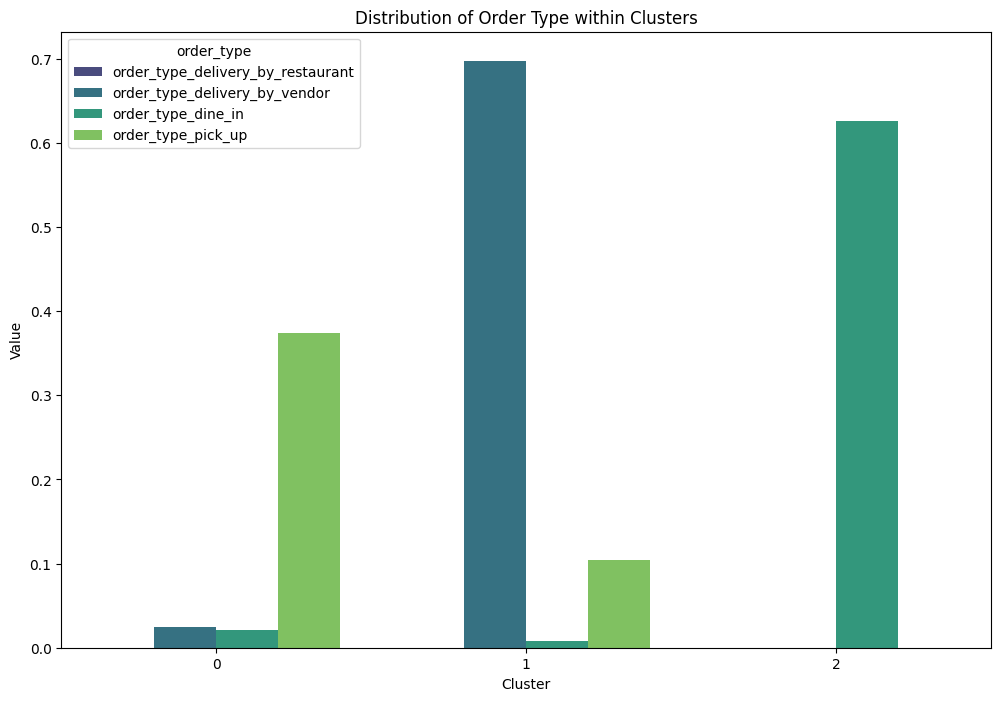

                                             value                           \
                                             count      mean       std  min   
cluster variable                                                              
0       order_type_delivery_by_restaurant  41625.0  0.000000  0.000000  0.0   
        order_type_delivery_by_vendor      41625.0  0.024048  0.153200  0.0   
        order_type_dine_in                 41625.0  0.021213  0.144096  0.0   
        order_type_pick_up                 41625.0  0.373598  0.483764  0.0   
1       order_type_delivery_by_restaurant  15163.0  0.000066  0.008121  0.0   
        order_type_delivery_by_vendor      15163.0  0.697487  0.459361  0.0   
        order_type_dine_in                 15163.0  0.007782  0.087875  0.0   
        order_type_pick_up                 15163.0  0.104861  0.306384  0.0   
2       order_type_delivery_by_restaurant    973.0  0.000000  0.000000  0.0   
        order_type_delivery_by_vendor        973.0  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming kmeans_data is your DataFrame
# Use pd.melt to reshape the data for barplot
melted_data = pd.melt(kmeans_data, id_vars=['cluster'], value_vars=['order_type_delivery_by_restaurant', 'order_type_delivery_by_vendor', 'order_type_dine_in','order_type_pick_up'], var_name='order_type')

# Barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value', hue='order_type', data=melted_data, palette='viridis', ci=None)

plt.title('Distribution of Order Type within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.show()

# Use pd.melt to reshape the data for barplot
melted_data = pd.melt(kmeans_data, id_vars=['cluster'], value_vars=['order_type_delivery_by_restaurant', 'order_type_delivery_by_vendor', 'order_type_dine_in','order_type_pick_up'])

# Group by 'cluster' and 'variable', and calculate summary statistics
service_type_stats = melted_data.groupby(['cluster', 'variable']).describe()

# Display summary statistics for each cluster and service type
print(service_type_stats)

Cluster 0:

order_type_delivery_by_restaurant 的比例為 0%，order_type_delivery_by_vendor 為 2.4%，order_type_dine_in 為 2.1%，order_type_pick_up 為 37.4%。
顯示這個群集的客戶主要選擇**外賣**，其中以 order_type_pick_up 的比例最高，**自取**的人最多。

Cluster 1:

order_type_delivery_by_restaurant 的比例為 0.0066%，order_type_delivery_by_vendor 為 69.7%，order_type_dine_in 為 0.78%，order_type_pick_up 為 10.5%。
這個群集的客戶主要選擇**外賣**，特別是使用**外送平台**（order_type_delivery_by_vendor）的比例最高。

Cluster 2:

order_type_delivery_by_restaurant 和 order_type_delivery_by_vendor 的比例均為 0%，order_type_dine_in 為 62.6%，order_type_pick_up 為 0%。
這個群集的客戶主要**在餐廳內用餐**，顯示 order_type_dine_in 的比例最高。

##最後分群結論


Cluster 0:

顧客人數分佈： 主要集中在平均水平附近，呈現相對穩定趨勢。差異不大，並呈現較為均勻的分布。

交易金額： 金額呈現明顯的負偏態，大多數交易金額分佈在較小的範圍內，顯示低金額的交易趨勢。

服務類型偏好： 以外帶服務為主，其中以自取的比例最高。

平台偏好： 主要使用 iCHEF 餐廳平台。

點餐方式： 以外賣為主，尤其以自取的方式居多。

Cluster 1:

顧客人數分佈： 同樣集中在平均水平附近，呈現相對穩定趨勢。差異較小，並呈現相對均勻的分布。

交易金額： 金額呈現正偏態，大多數交易金額集中在較高的範圍內，顯示高金額的交易趨勢。

服務類型偏好： 以外送服務為主，尤其以外送平台的比例最高。

平台偏好： 主要使用 Foodpanda 外送平台。

點餐方式： 以外賣為主，特別是使用外送平台的比例最高。

Cluster 2:

顧客人數分佈： 分布相對較廣，包含一些極端情況，顯示顧客人數差異較大。

交易金額： 金額分佈相對均勻，但包含一些極端情況，金額差異較大。

服務類型偏好： 以室內服務為主，並且沒有使用外送服務。

平台偏好： 主要在餐廳內用餐，使用 iCHEF Instore 餐廳平台。

點餐方式： 以在餐廳內用餐為主，且沒有使用外賣服務。








習慣外帶族（Takeout Enthusiasts） - Cluster 0:

這群客戶主要偏好外帶服務，以自取為主，集中在平均水平附近的顧客人數和低金額交易。
高價值外送客戶（High-Value Delivery Customers） - Cluster 1:

這群客戶主要喜歡使用外送服務，尤其以外送平台為主，顧客人數相對穩定，且金額較高。
室內用餐體驗者（Indoor Dining Enthusiasts） - Cluster 2:

這群客戶主要在餐廳內用餐，且沒有使用外送服務。顧客人數分佈相對廣泛，包含一些極端情況。